# Annotation file lookup

**Importing necessary python packages**

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jams
import os

**Importing annotation data**

In [95]:
# get list of file names in folder
def load_file_names(dir: str = '../data/raw/annotation/') -> list:
    # create empty list
    filenames = []

    # go through directory and append path+file name to list
    for f in os.listdir(dir):
        filenames.append(dir+f)
    return filenames


# loading jams file for song
def load_jams_file(f: str or list) -> jams.core.JAMS:
    # return jams structure
    return jams.load(f)


# accessing single pickups:
def load_time_freq_data(j: jams.core.JAMS, namespace: str = 'pitch_contour') -> pd.DataFrame:
    # E2–A2–D3–G3–B3–E4
    stringMap = {0: 'E', 1: 'A', 2: 'D', 3: 'G', 4: 'H', 5: 'e'}

    # create empty dataframe
    df = pd.DataFrame()

    # load all played frequencies and timings for all 6 strings
    for i in range(6):
        data = pd.DataFrame(j.annotations[namespace][i])
        freq = pd.json_normalize(data['value'])['frequency']
        temp = pd.concat([data['time'], freq], axis=1)
        temp['string'] = stringMap[i]
        df = pd.concat([df, temp], axis=0)

    return df

files = load_file_names()
jams_file = load_jams_file(files[0])
song_df = load_time_freq_data(jams_file).sort_values(by='time', ascending=True)

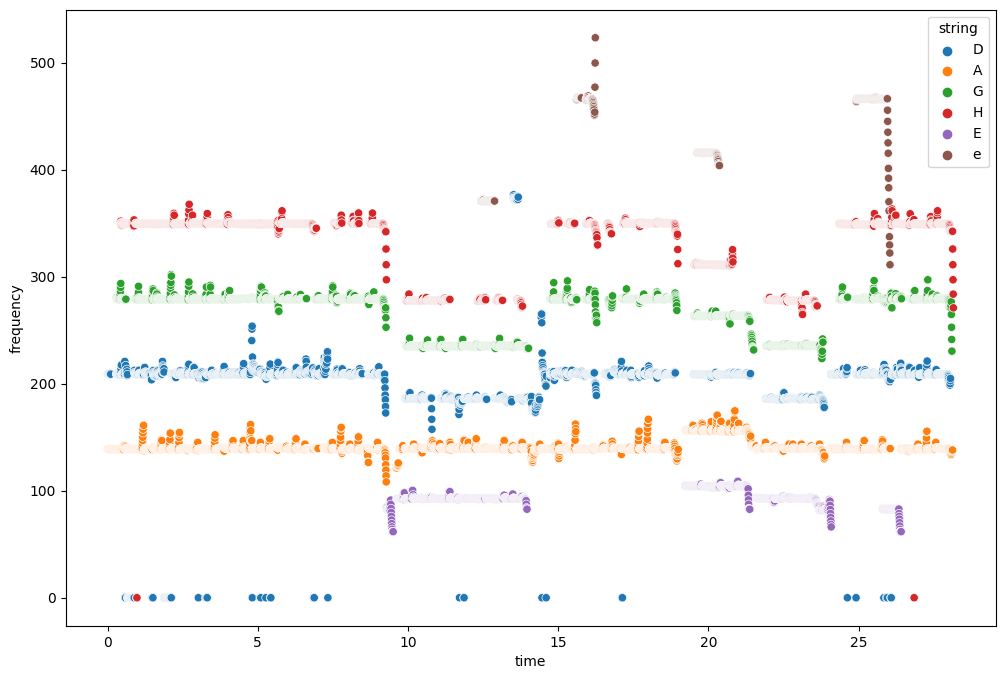

In [96]:
fig, _ = plt.subplots(figsize=(12, 8))

# displaying frequencies played on high e string over time
sns.scatterplot(data=song_df, x='time', y='frequency', hue='string');